In [1]:
import os
import glob
import rasterio

def read_tif_files(base_dir):
    """
    Duyệt qua tất cả các file .tif trong cấu trúc:
      base_dir/yyyy/mm/dd/*.tif
    và trả về một dictionary với key là ngày (YYYY-MM-DD)
    và value là danh sách các file chứa dữ liệu và metadata.
    """
    pattern = os.path.join(base_dir, '*', '*', '*', '*.tif')
    file_list = glob.glob(pattern)
    file_list.sort()
    print(f"Tìm được {len(file_list)} file trong thư mục {base_dir}")
    
    data_dict = {}
    for file_path in file_list:
        parts = file_path.split(os.sep)
        year, month, day = parts[-4], parts[-3], parts[-2]
        date_str = f"{year}-{month}-{day}"
        
        try:
            with rasterio.open(file_path) as src:
                data = src.read(1)
                meta = src.meta
        except Exception as e:
            print(f"Lỗi đọc file {file_path}: {e}")
            continue
        
        data_dict.setdefault(date_str, []).append({
            'file': file_path,
            'data': data,
            'meta': meta
        })
    
    return data_dict

# Đọc dữ liệu khí tượng ERA5
era5_base_dir = os.path.join("DATA_SV", "ERA5")
era5_vars = [
    'V850', 'V250', 'U850', 'U250', 'TCWV', 'TCW', 'TCLW',
    'SSHF', 'SLOR', 'SLHF', 'R850', 'R500', 'R250',
    'PEV', 'KX', 'ISOR', 'IE', 'EWSS', 'CIN', 'CAPE'
]
era5_data = {}
for var in era5_vars:
    var_dir = os.path.join(era5_base_dir, var)
    print(f"\nĐang đọc dữ liệu ERA5 cho biến {var}")
    era5_data[var] = read_tif_files(var_dir)

# Đọc dữ liệu Hima
hima_base_dir = os.path.join("DATA_SV", "Hima")
hima_vars = [
    'B04B', 'B05B', 'B06B', 'B09B', 'B10B', 'B11B',
    'B12B', 'B14B', 'B16B', 'I2B', 'I4B', 'IRB', 'VSB', 'WVB'
]
hima_data = {}
for var in hima_vars:
    var_dir = os.path.join(hima_base_dir, var)
    print(f"\nĐang đọc dữ liệu Hima cho biến {var}")
    hima_data[var] = read_tif_files(var_dir)

# Đọc dữ liệu mưa radar
radar_base_dir = os.path.join("DATA_SV", "Precipitation", "Radar")
print("\nĐang đọc dữ liệu mưa radar...")
radar_data = read_tif_files(radar_base_dir)



Đang đọc dữ liệu ERA5 cho biến V850
Tìm được 2928 file trong thư mục DATA_SV\ERA5\V850

Đang đọc dữ liệu ERA5 cho biến V250
Tìm được 2928 file trong thư mục DATA_SV\ERA5\V250

Đang đọc dữ liệu ERA5 cho biến U850
Tìm được 2928 file trong thư mục DATA_SV\ERA5\U850

Đang đọc dữ liệu ERA5 cho biến U250
Tìm được 2928 file trong thư mục DATA_SV\ERA5\U250

Đang đọc dữ liệu ERA5 cho biến TCWV
Tìm được 2928 file trong thư mục DATA_SV\ERA5\TCWV

Đang đọc dữ liệu ERA5 cho biến TCW
Tìm được 2928 file trong thư mục DATA_SV\ERA5\TCW

Đang đọc dữ liệu ERA5 cho biến TCLW
Tìm được 2928 file trong thư mục DATA_SV\ERA5\TCLW

Đang đọc dữ liệu ERA5 cho biến SSHF
Tìm được 2928 file trong thư mục DATA_SV\ERA5\SSHF

Đang đọc dữ liệu ERA5 cho biến SLOR
Tìm được 2928 file trong thư mục DATA_SV\ERA5\SLOR

Đang đọc dữ liệu ERA5 cho biến SLHF
Tìm được 2928 file trong thư mục DATA_SV\ERA5\SLHF

Đang đọc dữ liệu ERA5 cho biến R850
Tìm được 2928 file trong thư mục DATA_SV\ERA5\R850

Đang đọc dữ liệu ERA5 cho biến R5

Tìm thấy 101 ngày có đầy đủ dữ liệu
Kích thước X: (95, 6, 90, 250, 35)
Kích thước y: (95, 90, 250, 1)

=== Huấn luyện mô hình dự báo 1 giờ tới ===
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - loss: 0.2481 - mae: 0.4409

10/10 ━━━━━━━━━━━━━━━━━━━━ 100s 9s/step - loss: 0.2446 - mae: 0.4374 - val_loss: 0.2141 - val_mae: 0.4627 - learning_rate: 0.0010
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - loss: 0.1145 - mae: 0.2711

10/10 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - loss: 0.1135 - mae: 0.2699 - val_loss: 0.1451 - val_mae: 0.3808 - learning_rate: 0.0010
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.0815 - mae: 0.2258

10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 8s/step - loss: 0.0810 - mae: 0.2246 - val_loss: 0.1009 - val_mae: 0.3153 - learning_rate: 0.0010
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.0620 - mae: 0.1832

10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 7s/step - loss: 0.0618 - mae: 0.1824 - val_loss: 0.0426 - val_mae: 0.2051 - learning_rate: 0.0010
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.0459 - mae: 0.1507

10/10 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - loss: 0.0457 - mae: 0.1504 - val_loss: 0.0323 - val_mae: 0.1786 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0323 - mae: 0.1786
Mô hình dự báo 1h - Val Loss: 0.0323, Val MAE: 0.1786

=== Huấn luyện mô hình dự báo 2 giờ tới ===
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.2588 - mae: 0.4501

10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - loss: 0.2545 - mae: 0.4464 - val_loss: 0.2110 - val_mae: 0.4593 - learning_rate: 0.0010
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.1047 - mae: 0.2853

10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - loss: 0.1036 - mae: 0.2836 - val_loss: 0.1962 - val_mae: 0.4417 - learning_rate: 0.0010
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - loss: 0.0637 - mae: 0.2050 - val_loss: 0.4160 - val_mae: 0.6409 - learning_rate: 0.0010
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - loss: 0.0469 - mae: 0.1539 - val_loss: 0.9410 - val_mae: 0.9602 - learning_rate: 0.0010
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.0398 - mae: 0.1248 - val_loss: 0.7644 - val_mae: 0.8615 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1962 - mae: 0.4417
Mô hình dự báo 2h - Val Loss: 0.1962, Val MAE: 0.4417

=== Huấn luyện mô hình dự báo 3 giờ tới ===
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.2649 - mae: 0.4661

10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - loss: 0.2611 - mae: 0.4633 - val_loss: 0.2254 - val_mae: 0.4747 - learning_rate: 0.0010
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.1247 - mae: 0.3308 - val_loss: 0.2881 - val_mae: 0.5354 - learning_rate: 0.0010
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.0797 - mae: 0.2610 - val_loss: 0.7458 - val_mae: 0.8589 - learning_rate: 0.0010
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.0539 - mae: 0.2073 - val_loss: 0.9429 - val_mae: 0.9650 - learning_rate: 0.0010
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.0389 - mae: 0.1660 - val_loss: 0.9395 - val_mae: 0.9631 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2254 - mae: 0.4747
Mô hình dự báo 3h - Val Loss: 0.2254, Val MAE: 0.4747

=== Huấn luyện mô hình dự báo 4 giờ tới ===
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.2460 - mae: 0.4497

10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - loss: 0.2421 - mae: 0.4466 - val_loss: 0.2124 - val_mae: 0.4609 - learning_rate: 0.0010
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - loss: 0.1201 - mae: 0.3279

10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.1192 - mae: 0.3266 - val_loss: 0.1557 - val_mae: 0.3945 - learning_rate: 0.0010
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.0819 - mae: 0.2670

10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.0814 - mae: 0.2661 - val_loss: 0.0997 - val_mae: 0.3152 - learning_rate: 0.0010
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.0594 - mae: 0.2206

10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.0590 - mae: 0.2198 - val_loss: 0.0547 - val_mae: 0.2313 - learning_rate: 0.0010
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - loss: 0.0431 - mae: 0.1786

10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.0429 - mae: 0.1780 - val_loss: 0.0379 - val_mae: 0.1890 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0379 - mae: 0.1890
Mô hình dự báo 4h - Val Loss: 0.0379, Val MAE: 0.1890

=== Huấn luyện mô hình dự báo 5 giờ tới ===
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - loss: 0.2584 - mae: 0.4647

10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - loss: 0.2550 - mae: 0.4620 - val_loss: 0.2206 - val_mae: 0.4697 - learning_rate: 0.0010
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.1287 - mae: 0.3253

10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.1274 - mae: 0.3233 - val_loss: 0.1390 - val_mae: 0.3704 - learning_rate: 0.0010
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - loss: 0.0737 - mae: 0.2250

10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.0732 - mae: 0.2236 - val_loss: 0.1333 - val_mae: 0.3505 - learning_rate: 0.0010
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.0510 - mae: 0.1599 - val_loss: 0.2788 - val_mae: 0.5194 - learning_rate: 0.0010
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.0420 - mae: 0.1225 - val_loss: 0.5441 - val_mae: 0.7346 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1333 - mae: 0.3505
Mô hình dự báo 5h - Val Loss: 0.1333, Val MAE: 0.3505

=== Huấn luyện mô hình dự báo 6 giờ tới ===
Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - loss: 0.2402 - mae: 0.4490

10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - loss: 0.2370 - mae: 0.4463 - val_loss: 0.2194 - val_mae: 0.4683 - learning_rate: 0.0010
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - loss: 0.1143 - mae: 0.3042

10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - loss: 0.1131 - mae: 0.3020 - val_loss: 0.1871 - val_mae: 0.4287 - learning_rate: 0.0010
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - loss: 0.0679 - mae: 0.2065 - val_loss: 0.2435 - val_mae: 0.4830 - learning_rate: 0.0010
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 0.0516 - mae: 0.1536

10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step - loss: 0.0515 - mae: 0.1529 - val_loss: 0.1470 - val_mae: 0.3631 - learning_rate: 0.0010
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - loss: 0.0449 - mae: 0.1222 - val_loss: 0.1785 - val_mae: 0.4041 - learning_rate: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1470 - mae: 0.3631
Mô hình dự báo 6h - Val Loss: 0.1470, Val MAE: 0.3631
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


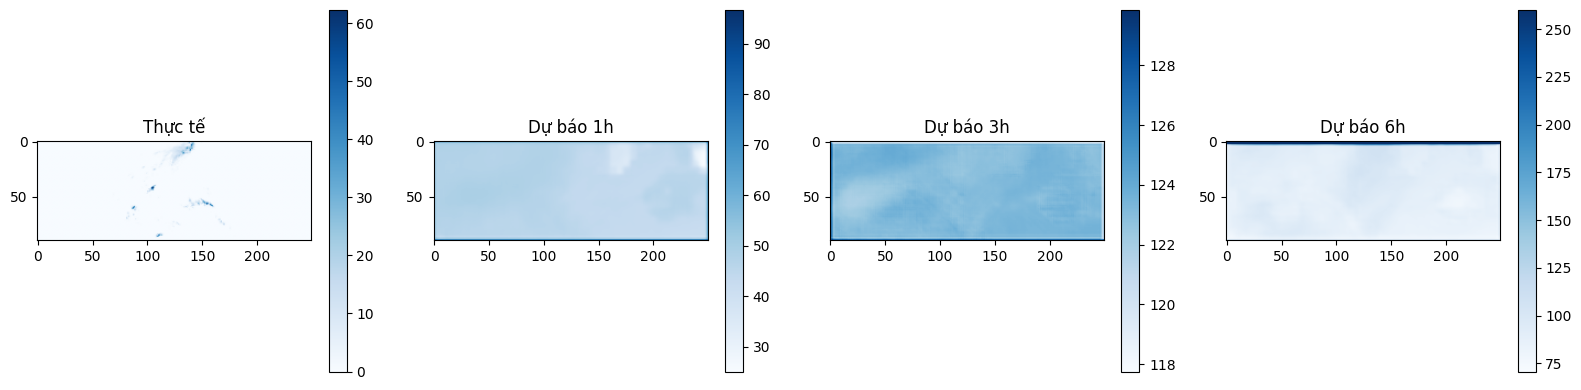

Đã hoàn thành mô hình dự báo lượng mưa!


In [10]:
import os
import numpy as np
import glob
import rasterio
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Input, ConvLSTM2D, BatchNormalization, Conv2D, Conv3D,
    MaxPooling2D, MaxPooling3D, TimeDistributed, Flatten, Dense, Dropout
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Hàm đọc dữ liệu mà bạn đã có
def read_tif_files(base_dir):
    """ 
    Duyệt qua tất cả các file .tif trong cấu trúc: 
    base_dir/yyyy/mm/dd/*.tif và trả về một dictionary với key là ngày (YYYY-MM-DD) 
    và value là danh sách các file chứa dữ liệu và metadata. 
    """
    pattern = os.path.join(base_dir, '*', '*', '*', '*.tif')
    file_list = glob.glob(pattern)
    file_list.sort()
    print(f"Tìm được {len(file_list)} file trong thư mục {base_dir}")
    
    data_dict = {}
    for file_path in file_list:
        parts = file_path.split(os.sep)
        year, month, day = parts[-4], parts[-3], parts[-2]
        date_str = f"{year}-{month}-{day}"
        
        try:
            with rasterio.open(file_path) as src:
                data = src.read(1)
                meta = src.meta
        except Exception as e:
            print(f"Lỗi đọc file {file_path}: {e}")
            continue
            
        data_dict.setdefault(date_str, []).append({
            'file': file_path,
            'data': data,
            'meta': meta
        })
    
    return data_dict

def preprocess_data(data_dict, fill_method='mean'):
    """
    Tiền xử lý dữ liệu, xử lý giá trị NaN và chuẩn hóa dữ liệu
    
    Args:
        data_dict: Dictionary chứa dữ liệu
        fill_method: Phương pháp điền giá trị thiếu ('mean', 'median', 'zero')
    
    Returns:
        Dictionary đã được xử lý
    """
    processed_dict = {}
    
    for date, data_list in data_dict.items():
        processed_dict[date] = []
        
        for item in data_list:
            data = item['data']
            
            # Xác định các giá trị NaN hoặc giá trị khuyết
            invalid_mask = ~np.isfinite(data) | (data < -9000)  # Giả sử -9999 là giá trị fill value
            
            # Điền giá trị thiếu
            if fill_method == 'mean' and not np.all(invalid_mask):
                fill_value = np.nanmean(data[~invalid_mask])
            elif fill_method == 'median' and not np.all(invalid_mask):
                fill_value = np.nanmedian(data[~invalid_mask])
            else:
                fill_value = 0
                
            data_filled = data.copy()
            data_filled[invalid_mask] = fill_value
            
            processed_item = {
                'file': item['file'],
                'data': data_filled,
                'meta': item['meta']
            }
            
            processed_dict[date].append(processed_item)
    
    return processed_dict

def align_data_by_dates(radar_data, era5_data, hima_data):
    """
    Sắp xếp và căn chỉnh dữ liệu theo ngày tháng.
    
    Returns:
        Các array chứa dữ liệu đã được căn chỉnh theo thời gian
    """
    common_dates = set(radar_data.keys())
    
    # Tìm các ngày có đầy đủ dữ liệu trong cả 3 nguồn
    for var in era5_data:
        common_dates &= set(era5_data[var].keys())
    
    for var in hima_data:
        common_dates &= set(hima_data[var].keys())
    
    common_dates = sorted(list(common_dates))
    print(f"Tìm thấy {len(common_dates)} ngày có đầy đủ dữ liệu")
    
    if len(common_dates) == 0:
        raise ValueError("Không tìm thấy ngày nào có đầy đủ dữ liệu từ tất cả các nguồn")
    
    # Khởi tạo danh sách lưu trữ
    aligned_radar = []
    aligned_era5 = {var: [] for var in era5_data}
    aligned_hima = {var: [] for var in hima_data}
    
    # Sắp xếp dữ liệu theo ngày
    for date in common_dates:
        # Thêm dữ liệu radar
        for item in radar_data[date]:
            aligned_radar.append({
                'date': date,
                'data': item['data'],
                'meta': item['meta']
            })
        
        # Thêm dữ liệu ERA5
        for var in era5_data:
            for item in era5_data[var][date]:
                aligned_era5[var].append({
                    'date': date,
                    'data': item['data'],
                    'meta': item['meta']
                })
        
        # Thêm dữ liệu Hima
        for var in hima_data:
            for item in hima_data[var][date]:
                aligned_hima[var].append({
                    'date': date,
                    'data': item['data'],
                    'meta': item['meta']
                })
    
    return aligned_radar, aligned_era5, aligned_hima, common_dates

def normalize_data(data_list):
    """
    Chuẩn hóa dữ liệu về khoảng [0, 1]
    """
    # Tách các mảng dữ liệu
    arrays = [item['data'] for item in data_list]
    
    # Tìm giá trị min và max
    global_min = min(np.min(arr) for arr in arrays)
    global_max = max(np.max(arr) for arr in arrays)
    
    # Chuẩn hóa
    normalized_list = []
    for item in data_list:
        normalized_item = item.copy()
        normalized_item['data'] = (item['data'] - global_min) / (global_max - global_min)
        normalized_list.append(normalized_item)
    
    normalization_params = {
        'min': global_min,
        'max': global_max
    }
    
    return normalized_list, normalization_params

def create_sequences(data_array, seq_length, pred_horizon):
    """
    Tạo các chuỗi dữ liệu cho mô hình Conv-LSTM từ mảng numpy
    
    Args:
        data_array: Mảng numpy chứa dữ liệu radar theo thời gian
        seq_length: Độ dài chuỗi đầu vào (số khung thời gian làm đầu vào)
        pred_horizon: Số giờ dự báo trước (từ 1-6h)
        
    Returns:
        X: Mảng đầu vào cho mô hình
        y: Mảng đầu ra mục tiêu
    """
    X, y = [], []
    
    # Tạo chuỗi dữ liệu
    for i in range(len(data_array) - seq_length - pred_horizon + 1):
        # Lấy dữ liệu đầu vào
        input_seq = data_array[i:i+seq_length]
        
        # Lấy dữ liệu đầu ra (dự báo)
        output = data_array[i + seq_length + pred_horizon - 1]
        
        X.append(input_seq)
        y.append(output)
    
    # Chuyển đổi sang numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    return X, y


def build_convlstm_model(input_shape, output_shape):
    """
    Xây dựng mô hình Conv-LSTM
    
    Args:
        input_shape: Kích thước đầu vào (timesteps, rows, cols, features)
        output_shape: Kích thước đầu ra (rows, cols, 1)
    """
    model = Sequential()
    
    # Lớp Conv-LSTM đầu tiên
    model.add(ConvLSTM2D(
        filters=64,
        kernel_size=(3, 3),
        padding='same',
        return_sequences=True,
        activation='relu',
        recurrent_dropout=0.2,
        input_shape=input_shape
    ))
    model.add(BatchNormalization())
    
    # Lớp Conv-LSTM thứ hai
    model.add(ConvLSTM2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        return_sequences=True,
        activation='relu',
        recurrent_dropout=0.2
    ))
    model.add(BatchNormalization())
    
    # Lớp Conv-LSTM thứ ba
    model.add(ConvLSTM2D(
        filters=32,
        kernel_size=(3, 3),
        padding='same',
        return_sequences=False,
        activation='relu',
        recurrent_dropout=0.2
    ))
    model.add(BatchNormalization())
    
    # Lớp Conv2D để tạo ra dự báo
    model.add(Conv2D(
        filters=1,
        kernel_size=(3, 3),
        padding='same',
        activation='sigmoid'
    ))
    
    # Biên dịch mô hình
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

def create_multivariate_sequences(radar_data, era5_data, hima_data, common_dates, 
                                  seq_length=6, pred_horizon=6):
    """
    Tạo chuỗi dữ liệu đa biến kết hợp radar + ERA5 + Hima
    Args:
        radar_data: list of {'data': 2D array, ...}
        era5_data: dict[var] -> list of {'data': 2D array, ...}
        hima_data: dict[var] -> list of {'data': 2D array, ...}
        common_dates: list of date strings
        seq_length: số bước time-step vào
        pred_horizon: bước dự báo ra
    Returns:
        X: (n_samples, seq_length, H, W, C)
        y: (n_samples, H, W, 1)
        params: normalization params của radar (min, max)
    """
    # 1) Chuẩn hóa từng nguồn dữ liệu
    norm_radar, radar_params = normalize_data(radar_data)
    
    norm_era5 = {}
    for var in era5_data:
        norm_era5[var], _ = normalize_data(era5_data[var])
    
    norm_hima = {}
    for var in hima_data:
        norm_hima[var], _ = normalize_data(hima_data[var])
    
    # 2) Xây list frame đa kênh theo common_dates
    frames = []
    for i, date in enumerate(common_dates):
        # radar channel
        channels = [ norm_radar[i]['data'][..., None] ]
        # ERA5 channels
        for var in norm_era5:
            channels.append(norm_era5[var][i]['data'][..., None])
        # Hima channels
        for var in norm_hima:
            channels.append(norm_hima[var][i]['data'][..., None])
        # stack thành (H, W, C)
        frame = np.concatenate(channels, axis=-1)
        frames.append(frame)
    
    # 3) Stack thành array (T, H, W, C)
    multi_array = np.stack(frames, axis=0)
    
    # 4) Tạo X,y với hàm cũ
    X_raw, y_raw = create_sequences(multi_array, seq_length, pred_horizon)
    # X_raw: (N, seq_length, H, W, C), y_raw: (N, H, W, C)
    
    # 5) Nếu muốn y chỉ còn 1 channel (lượng mưa)
    #    giả sử lượng mưa là channel đầu tiên của y_raw
    X = X_raw
    y = y_raw[..., 0][..., None]  # (N, H, W, 1)
    
    return X, y, radar_params


def train_multi_horizon_models(X, y, radar_params, seq_length=6, 
                            max_horizon=6, val_split=0.2, epochs=5, batch_size=8):
    """
    Huấn luyện nhiều mô hình để dự báo từ 1 đến max_horizon giờ tới
    """
    models = {}
    histories = {}
    
    # Chia tập huấn luyện và kiểm định ngay từ đầu
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=val_split, random_state=42, shuffle=False)
    
    for horizon in range(1, max_horizon + 1):
        print(f"\n=== Huấn luyện mô hình dự báo {horizon} giờ tới ===")
        
        # Xây dựng mô hình
        input_shape = X_train.shape[1:]  # (timesteps, rows, cols, features)
        output_shape = y_train.shape[1:] # (rows, cols, 1)
        
        model = build_convlstm_model(input_shape, output_shape)
        
        # Callbacks
        callbacks = [
            EarlyStopping(patience=10, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=5),
            ModelCheckpoint(f"model_horizon_{horizon}.h5", save_best_only=True)
        ]
        
        # Huấn luyện mô hình
        history = model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val, y_val),
            callbacks=callbacks
        )
        
        # Lưu mô hình và lịch sử huấn luyện
        models[horizon] = model
        histories[horizon] = history.history
        
        # Đánh giá mô hình
        val_loss, val_mae = model.evaluate(X_val, y_val)
        print(f"Mô hình dự báo {horizon}h - Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")
    
    return models, histories, radar_params

def make_predictions(models, input_data, radar_params, horizons=[1, 3, 6]):
    """
    Thực hiện dự báo cho các khoảng thời gian khác nhau
    """
    predictions = {}
    
    for horizon in horizons:
        if horizon in models:
            # Dự báo
            predicted = models[horizon].predict(input_data)
            
            # Chuyển đổi về giá trị thực
            predicted = predicted * (radar_params['max'] - radar_params['min']) + radar_params['min']
            
            # Làm tròn các giá trị âm (nếu có)
            predicted[predicted < 0] = 0
            
            predictions[horizon] = predicted
    
    return predictions

def visualize_predictions(original, predictions, timestep=0):
    """
    Hiển thị kết quả dự báo
    """
    fig, axes = plt.subplots(1, len(predictions) + 1, figsize=(4 * (len(predictions) + 1), 4))
    
    # Hiển thị dữ liệu gốc
    im = axes[0].imshow(original[timestep, :, :, 0], cmap='Blues')
    axes[0].set_title('Thực tế')
    plt.colorbar(im, ax=axes[0])
    
    # Hiển thị các dự báo
    for i, horizon in enumerate(sorted(predictions.keys())):
        pred = predictions[horizon][timestep, :, :, 0]
        im = axes[i+1].imshow(pred, cmap='Blues')
        axes[i+1].set_title(f'Dự báo {horizon}h')
        plt.colorbar(im, ax=axes[i+1])
    
    plt.tight_layout()
    plt.savefig('precipitation_forecast.png')
    plt.show()

# Hàm chính
def main():
    # Đọc dữ liệu (sử dụng các biến toàn cục được giả định là đã được tạo trước đó)
    # Giả sử các biến era5_data, hima_data và radar_data đã tồn tại
    global era5_data, hima_data, radar_data
    
    # Tiền xử lý dữ liệu
    processed_radar = preprocess_data(radar_data, fill_method='zero')
    
    processed_era5 = {}
    for var in era5_vars:
        if var in era5_data:
            processed_era5[var] = preprocess_data(era5_data[var], fill_method='mean')
    
    processed_hima = {}
    for var in hima_vars:
        if var in hima_data:
            processed_hima[var] = preprocess_data(hima_data[var], fill_method='median')
    
    # Căn chỉnh dữ liệu theo thời gian
    aligned_radar, aligned_era5, aligned_hima, common_dates = align_data_by_dates(
        processed_radar, processed_era5, processed_hima)
    
    # Chuẩn bị dữ liệu cho mô hình
    seq_length = 6  # Số khung thời gian làm đầu vào
    max_horizon = 6  # Dự báo tối đa 6 giờ tới
    
    # Tạo chuỗi dữ liệu đa biến radar+ERA5+Hima cho horizon=1
    X, y, radar_params = create_multivariate_sequences(
    aligned_radar, aligned_era5, aligned_hima, common_dates,
    seq_length=seq_length, pred_horizon=1
    )

    print(f"Kích thước X: {X.shape}")  # → (n_samples, 6, H, W, n_channels)
    print(f"Kích thước y: {y.shape}")  # → (n_samples, H, W, 1)

    
    # Huấn luyện các mô hình cho các khoảng thời gian dự báo khác nhau
    models, histories, radar_params = train_multi_horizon_models(
        X, y, radar_params, seq_length=seq_length, max_horizon=max_horizon,
        val_split=0.2, epochs=5, batch_size=8)
    
    # Thực hiện dự báo
    # Lấy một mẫu từ tập dữ liệu kiểm định
    test_sample = X[-1:] # mẫu cuối cùng
    
    predictions = make_predictions(models, test_sample, radar_params, horizons=[1, 3, 6])
    
    # Chuyển y về giá trị gốc để so sánh
    y_original = y * (radar_params['max'] - radar_params['min']) + radar_params['min']
    
    # Hiển thị kết quả
    visualize_predictions(y_original, predictions)
    
    # Lưu mô hình
    for horizon, model in models.items():
        model.save(f"rainfall_forecast_model_{horizon}h.h5")
    
    print("Đã hoàn thành mô hình dự báo lượng mưa!")

# Các biến toàn cục để chương trình chạy (giả sử các biến này đã được tạo từ đoạn code của bạn)
era5_vars = [
    'V850', 'V250', 'U850', 'U250', 'TCWV', 'TCW', 'TCLW', 'SSHF', 'SLOR', 'SLHF',
    'R850', 'R500', 'R250', 'PEV', 'KX', 'ISOR', 'IE', 'EWSS', 'CIN', 'CAPE'
]

hima_vars = [
    'B04B', 'B05B', 'B06B', 'B09B', 'B10B', 'B11B', 'B12B', 'B14B', 'B16B',
    'I2B', 'I4B', 'IRB', 'VSB', 'WVB'
]

if __name__ == "__main__":
    main()